# import Libraries

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [54]:
#Read Data
pd.set_option('display.max_columns', None)
df=pd.read_csv("marketing_campaign.csv",sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

Data Analysis

In [55]:
#get informartion about my data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [56]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [57]:
df.shape

(2240, 29)

In [58]:
df.duplicated().sum()

0

In [59]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [60]:
# drop unecessary columns
df=df.drop(columns=["Dt_Customer","Recency", "NumDealsPurchases","NumWebVisitsMonth","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Z_CostContact","Z_Revenue","Response"],axis=1)

In [61]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
Complain                0
dtype: int64

In [62]:
df[df.Income.isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain
10,1994,1983,Graduation,Married,NaN,1,0,5,5,6,0,2,1,1,0,2,0
27,5255,1986,Graduation,Single,NaN,1,0,5,1,3,3,263,362,27,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,81,11,50,3,2,39,1,3,4,0
48,7244,1951,Graduation,Single,NaN,2,1,48,5,48,6,10,7,2,1,4,0
58,8557,1982,Graduation,Single,NaN,1,0,11,3,22,2,2,6,2,0,3,0
71,10629,1973,2n Cycle,Married,NaN,1,0,25,3,43,17,4,17,3,0,3,0
90,8996,1957,PhD,Married,NaN,2,1,230,42,192,49,37,53,7,2,8,0
91,9235,1957,Graduation,Single,NaN,1,1,7,0,8,2,0,1,1,0,2,0
92,5798,1973,Master,Together,NaN,0,0,445,37,359,98,28,18,2,4,8,0
128,8268,1961,PhD,Married,NaN,0,1,352,0,27,10,0,15,6,1,7,0


In [63]:
# removing the missing values
df = df.dropna()
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,635,88,546,172,88,88,8,10,4,0
1,2174,1954,Graduation,Single,46344.0,1,1,11,1,6,2,1,6,1,1,2,0
2,4141,1965,Graduation,Together,71613.0,0,0,426,49,127,111,21,42,8,2,10,0
3,6182,1984,Graduation,Together,26646.0,1,0,11,4,20,10,3,5,2,0,4,0
4,5324,1981,PhD,Married,58293.0,1,0,173,43,118,46,27,15,5,3,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,709,43,182,42,118,247,9,3,4,0
2236,4001,1946,PhD,Together,64014.0,2,1,406,0,30,0,0,8,8,2,5,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,908,48,217,32,12,24,2,3,13,0
2238,8235,1956,Master,Together,69245.0,0,1,428,30,214,80,30,61,6,5,10,0


In [64]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
Complain               0
dtype: int64

In [65]:
#customer Age
df["Age"]=2023-df["Year_Birth"]
df["Age"]

0       66
1       69
2       58
3       39
4       42
        ..
2235    56
2236    77
2237    42
2238    67
2239    69
Name: Age, Length: 2216, dtype: int64

In [66]:
print(df["Education"].value_counts())

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [68]:
# segmenting education level 
df["Education"] = df["Education"].replace({  
    "2n Cycle": "Master",
    "Graduation": "Bachelor",
    
})
df["Education"]


0       Bachelor
1       Bachelor
2       Bachelor
3       Bachelor
4            PhD
          ...   
2235    Bachelor
2236         PhD
2237    Bachelor
2238      Master
2239         PhD
Name: Education, Length: 2216, dtype: object

In [69]:
print(df["Marital_Status"].value_counts())

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64


In [70]:
df["Marital_Status"] = df["Marital_Status"].replace({
    
 
    "Together": "Married",
    "Absurd": "Single",
    "Widow": "Single",
    "YOLO": "Single",
    "Divorced": "Single",
    "Alone":"Single"

})


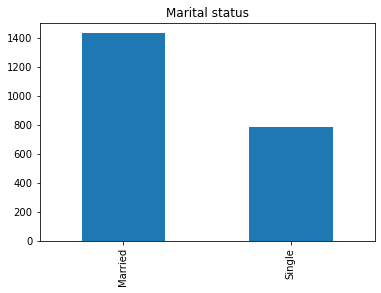

In [71]:
df['Marital_Status'].value_counts().plot(kind='bar')
plt.title('Marital status')
plt.show()

In [72]:
# total children in house 
df["Children"] = df["Kidhome"] + df["Teenhome"]
df["Children"]

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Children, Length: 2216, dtype: int64

In [73]:
df=df.drop(columns=["Kidhome","Teenhome"],axis=1)

In [74]:
#Parent 
df["Is_Parent"] = np.where(df.Children > 0, "Yes", "No")
df["Is_Parent"]

0        No
1       Yes
2        No
3       Yes
4       Yes
       ... 
2235    Yes
2236    Yes
2237     No
2238    Yes
2239    Yes
Name: Is_Parent, Length: 2216, dtype: object

In [75]:
#renaming columns
new_names = {'MntWines':'Wines','MntFruits':'Fruits', 'MntMeatProducts':'Meat', 
    'MntFishProducts':'Fish', 'MntSweetProducts':'Sweets',
    'MntGoldProds':'Gold_Products', 'NumWebPurchases':'Web', 'NumCatalogPurchases':'Catalog',
    'NumStorePurchases':'Store', 'Complain':'Complained?'}

df.rename(columns=new_names, inplace=True)

In [76]:
df["Complained?"].value_counts()

0    2195
1      21
Name: Complained?, dtype: int64

In [77]:
for i in df.index:
    if df.loc[i,'Complained?'] == 1:
        df.loc[i,'Complained?'] = 'Yes'
    elif df.loc[i,'Complained?'] == 0:
        df.loc[i,'Complained?'] = 'No'

In [78]:
df["Complained?"].value_counts()

No     2195
Yes      21
Name: Complained?, dtype: int64

In [79]:
# total spending on various items
df["Spent"] = df["Wines"] + df["Fruits"] + df["Meat"] + df["Fish"] + df["Sweets"] + df["Gold_Products"]
df["Spent"]

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Spent, Length: 2216, dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              2216 non-null   int64  
 1   Year_Birth      2216 non-null   int64  
 2   Education       2216 non-null   object 
 3   Marital_Status  2216 non-null   object 
 4   Income          2216 non-null   float64
 5   Wines           2216 non-null   int64  
 6   Fruits          2216 non-null   int64  
 7   Meat            2216 non-null   int64  
 8   Fish            2216 non-null   int64  
 9   Sweets          2216 non-null   int64  
 10  Gold_Products   2216 non-null   int64  
 11  Web             2216 non-null   int64  
 12  Catalog         2216 non-null   int64  
 13  Store           2216 non-null   int64  
 14  Complained?     2216 non-null   object 
 15  Age             2216 non-null   int64  
 16  Children        2216 non-null   int64  
 17  Is_Parent       2216 non-null   o

In [81]:
# stats
df.describe()

,ID,Year_Birth,Income,Wines,Fruits,Meat,Fish,Sweets,Gold_Products,Web,Catalog,Store,Age,Children,Spent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,4.085289,2.671029,5.800993,54.179603,0.947202,607.075361
std,3249.376275,11.985554,25173.076661,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,2.740951,2.926734,3.250785,11.985554,0.749062,602.900476
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,5.000000
25%,2814.750000,1959.000000,35303.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,2.000000,0.000000,3.000000,46.000000,0.000000,69.000000
50%,5458.500000,1970.000000,51381.500000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,4.000000,2.000000,5.000000,53.000000,1.000000,396.500000
75%,8421.750000,1977.000000,68522.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,6.000000,4.000000,8.000000,64.000000,1.000000,1048.000000
max,11191.000000,1996.000000,666666.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,27.000000,28.000000,13.000000,130.000000,3.000000,2525.000000


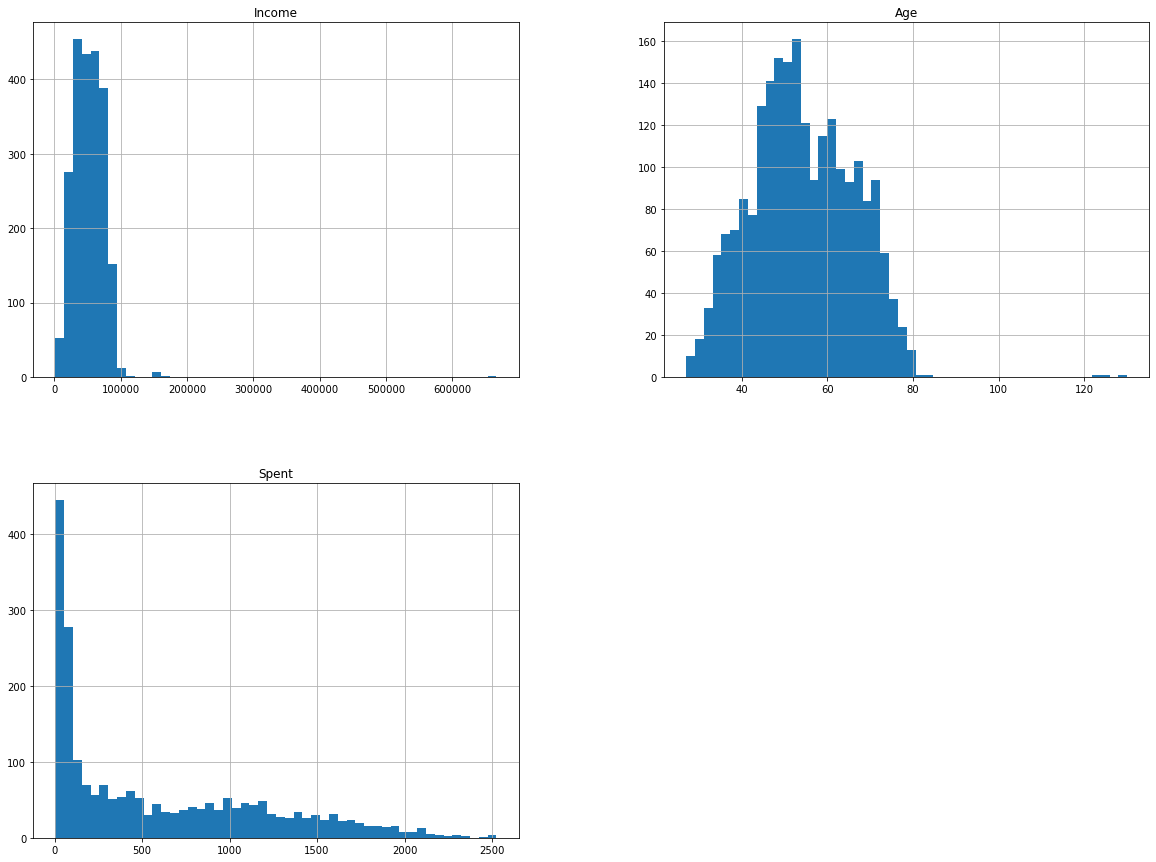

In [82]:
# checking for the outliers in the data 
df.hist(column=["Income", "Age", "Spent"], bins=50,figsize=(20,15))
plt.show()

In [83]:
len(df)

2216

In [84]:
df[df.Age > 90]

,ID,Year_Birth,Education,Marital_Status,Income,Wines,Fruits,Meat,Fish,Sweets,Gold_Products,Web,Catalog,Store,Complained?,Age,Children,Is_Parent,Spent
192,7829,1900,Master,Single,36640.0,15,6,8,7,4,25,2,1,2,Yes,123,1,Yes,65
239,11004,1893,Master,Single,60182.0,8,0,5,7,0,2,1,0,2,No,130,1,Yes,22
339,1150,1899,PhD,Married,83532.0,755,144,562,104,64,224,4,6,4,No,124,0,No,1853


In [85]:
# removing outliers
df = df[(df["Age"]<90)]
len(df)

2213

In [86]:
df[df["Income"] > 600000]

,ID,Year_Birth,Education,Marital_Status,Income,Wines,Fruits,Meat,Fish,Sweets,Gold_Products,Web,Catalog,Store,Complained?,Age,Children,Is_Parent,Spent
2233,9432,1977,Bachelor,Married,666666.0,9,14,18,8,1,12,3,1,3,No,46,1,Yes,62


In [87]:
df = df[(df["Income"] < 600000)]

In [88]:
# Total Customers
total_customers = sum(df.index.value_counts())

In [89]:
# Total Customer Income
total_income = sum(df.Income)

In [90]:
# Average Age Of Customers
avg_age = np.round(df.Age.mean(),1)

In [91]:
total_spent=sum(df.Spent)

Text(0.5, 1.0, 'Total Spent')

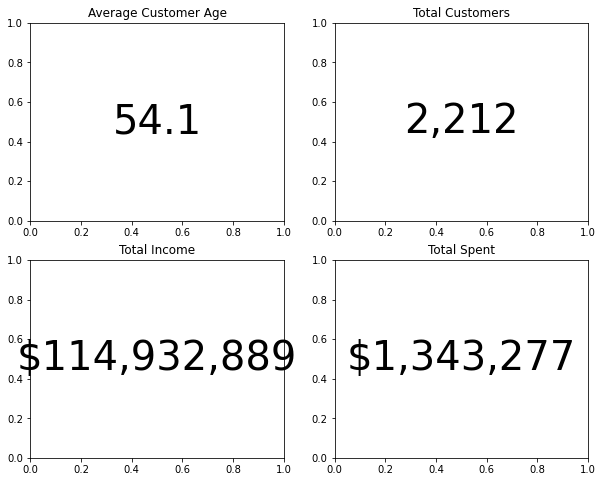

In [92]:
fig,ax=plt.subplots(2,2,figsize=(10,8))
ax[0,0].text(.5,.5,avg_age,ha="center",va="center",fontsize=40)
ax[0,0].set_title("Average Customer Age")
ax[0,1].text(.5,.5,f"{total_customers:,}",ha="center",va="center",fontsize=40)
ax[0,1].set_title("Total Customers")
ax[1,0].text(.5,.5,f"${total_income:,.0f}",ha="center",va="center",fontsize=40)
ax[1,0].set_title("Total Income")
ax[1,1].text(.5,.5,f"${total_spent:,}",ha="center",va="center",fontsize=40)
ax[1,1].set_title("Total Spent")

In [93]:
#total Amount Spent by customer Age
age_group=df.groupby("Age")
age_df=age_group["Wines","Fruits","Meat","Fish","Sweets","Gold_Products","Spent"].sum()
age_df.nlargest(7,"Spent")

<ipython-input-93-9743a2db9f9f>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  age_df=age_group["Wines","Fruits","Meat","Fish","Sweets","Gold_Products","Spent"].sum()


,Wines,Fruits,Meat,Fish,Sweets,Gold_Products,Spent
Age,,,,,,,
53,25400,2572,14554,3386,2425,3600,51937
48,25183,2313,10588,3768,2766,3433,48051
51,22802,1966,12669,2551,1824,3717,45529
47,23158,2004,12151,2730,1782,3325,45150
54,23803,1762,12260,2593,1553,3059,45030
58,23186,2133,11416,2395,2241,3414,44785
52,23040,1975,11258,2710,2285,2844,44112


In [94]:
age_df.nsmallest(5, 'Spent')

,Wines,Fruits,Meat,Fish,Sweets,Gold_Products,Spent
Age,,,,,,,
27,3,18,16,18,25,58,138
83,144,0,7,0,0,6,157
82,1285,42,716,55,0,21,2119
28,1421,99,1615,252,268,151,3806
29,1977,100,1776,336,79,104,4372


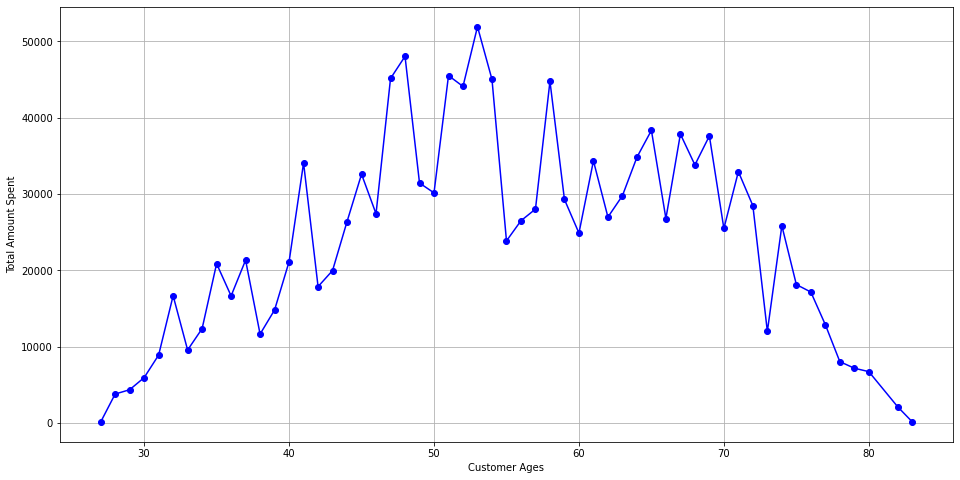

In [95]:
plt.figure(figsize=(16,8))
plt.plot(age_df.index,age_df["Spent"],'o-b')
plt.xlabel('Customer Ages')
plt.ylabel('Total Amount Spent')
plt.grid(visible=True)

The Highest Spender lie in 40's-50's

# Total Amount of Sales by the Education Level

In [96]:
edu_group=df.groupby("Education")
edu_df=edu_group[["Wines","Fruits","Meat","Fish","Sweets","Gold_Products","Spent"]].sum()
edu_df.head()

,Wines,Fruits,Meat,Fish,Sweets,Gold_Products,Spent
Education,,,,,,,
Bachelor,318102,34427,201301,48445,34914,56551,693740
Basic,391,600,618,921,654,1233,4417
Master,161684,13668,86469,21089,14536,24018,321464
PhD,195119,9546,81082,12824,9723,15362,323656


In [97]:
edu_df = edu_df.sort_values(by='Spent',ascending=True)
edu_df

,Wines,Fruits,Meat,Fish,Sweets,Gold_Products,Spent
Education,,,,,,,
Basic,391,600,618,921,654,1233,4417
Master,161684,13668,86469,21089,14536,24018,321464
PhD,195119,9546,81082,12824,9723,15362,323656
Bachelor,318102,34427,201301,48445,34914,56551,693740


<AxesSubplot:xlabel='Education', ylabel='Spent'>

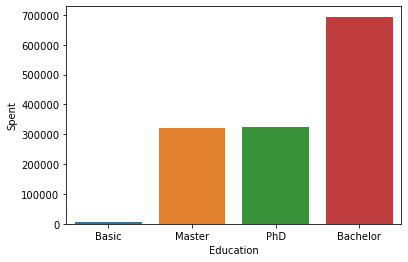

In [98]:
sns.barplot(x=edu_df.index,y=edu_df.Spent)

customer with Becholer degree has the highest spend value

# Total Amount Spent per product

In [99]:
products = df[['Wines','Meat','Fish','Fruits','Sweets','Gold_Products']]
products = pd.melt(products,var_name='Product',value_vars=['Wines','Meat','Fish','Fruits','Sweets','Gold_Products'],
                   value_name='Amount'
                   )

In [100]:
product_grp = products.groupby('Product')
product_df = product_grp[['Amount']].sum().sort_values(by='Amount',ascending=False)
product_df

,Amount
Product,
Wines,675296
Meat,369470
Gold_Products,97164
Fish,83279
Sweets,59827
Fruits,58241


<AxesSubplot:xlabel='Product', ylabel='Amount'>

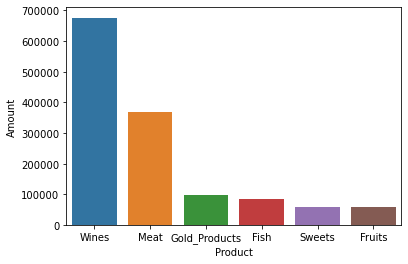

In [101]:
sns.barplot(x=product_df.index,y=product_df.Amount,data=product_df)

# Most used Sales Channel (Store, Web Or Catelog) 

In [102]:
sales_channel = df[['Store','Web','Catalog']]
sales_channel = pd.melt(sales_channel,var_name='Channel', value_vars=['Store','Web','Catalog'],value_name='No_Transactions')

In [103]:
channel_group = sales_channel.groupby('Channel')
channel_df = channel_group[['No_Transactions']].sum()
channel_df

,No_Transactions
Channel,
Catalog,5911
Store,12844
Web,9043


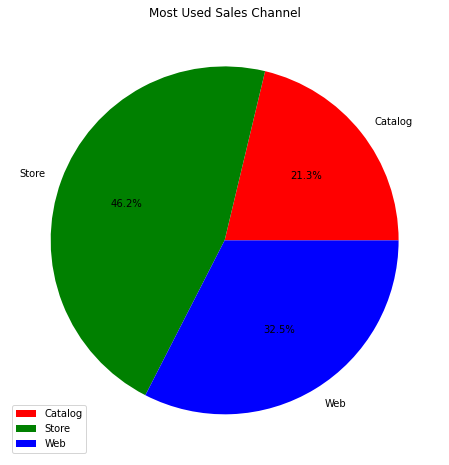

In [104]:
plt.figure(figsize=(16,8))
plt.pie(x=channel_df.No_Transactions,labels=channel_df.index,colors=["red","green","blue"],autopct='%1.1f%%')
plt.legend()
plt.title('Most Used Sales Channel');

<AxesSubplot:xlabel='Complained?', ylabel='count'>

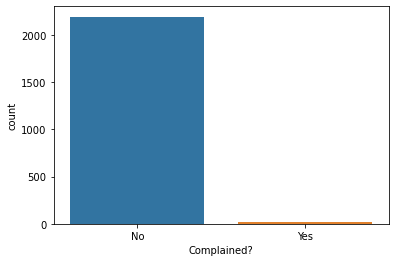

In [105]:
sns.countplot(x="Complained?",data=df)